In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
from torchvision import models, transforms

In [4]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [5]:
resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [8]:
from PIL import Image
img = Image.open("../data/p1ch2/shutterstock_578662351.jpg")

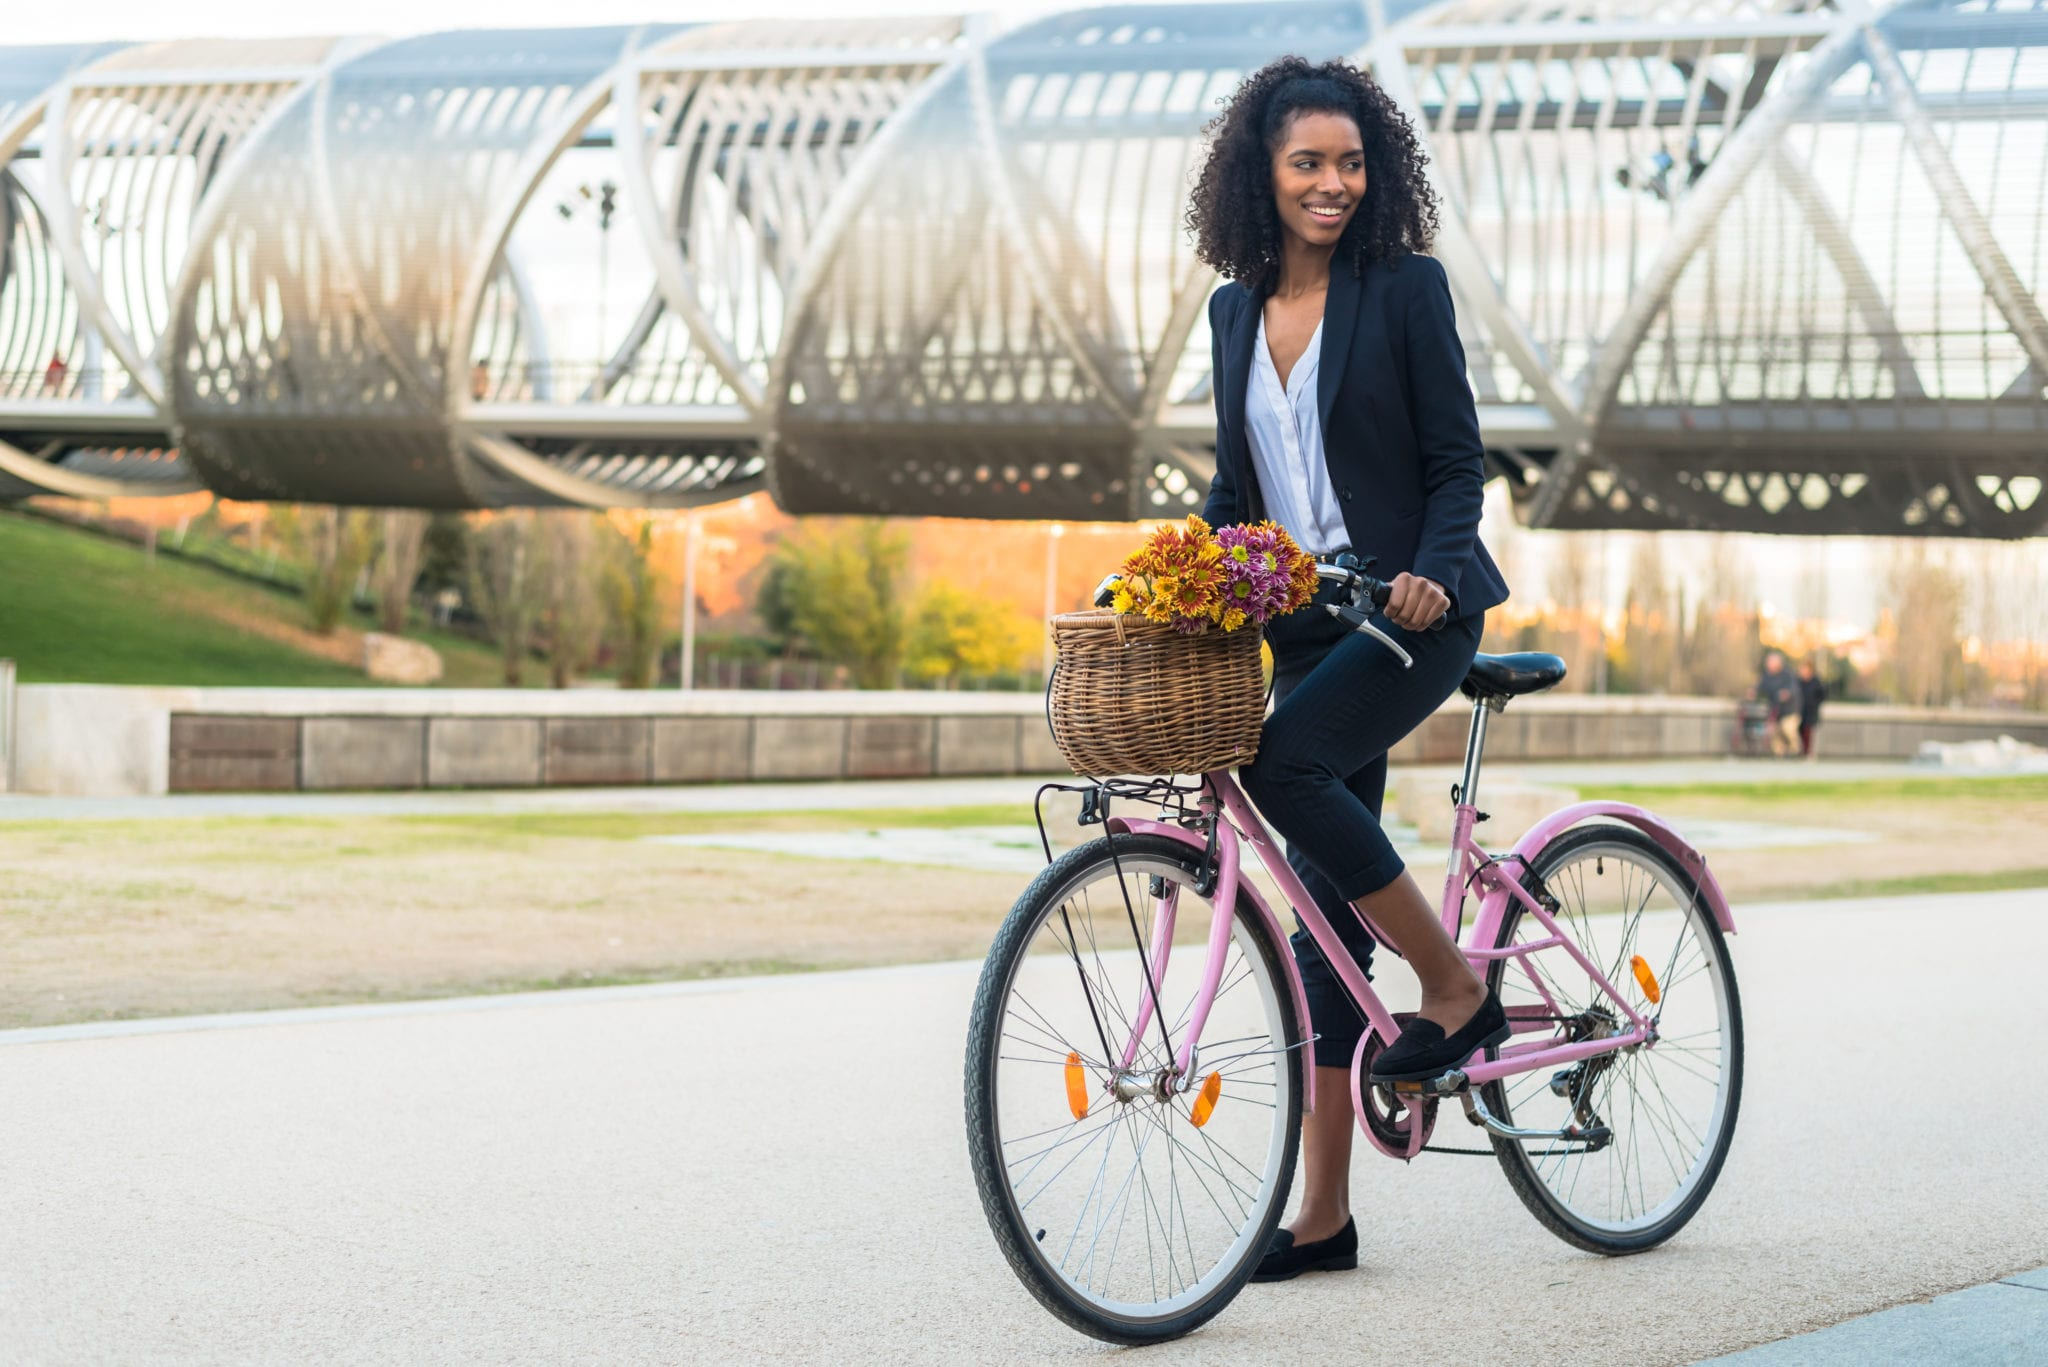

In [9]:
img

In [10]:
img_t = preprocess(img)

In [11]:
batch_t = torch.unsqueeze(img_t, 0)

In [12]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
out = resnet(batch_t)
out

tensor([[-1.1056e+00, -8.2533e-02,  1.3225e-01,  2.1408e-01, -3.6117e-01,
          1.5992e-01, -4.8567e-01,  1.8922e-01, -3.5618e-01, -6.4753e-01,
         -3.2916e-01, -6.0797e-01, -3.1507e-01, -3.0031e-01, -3.0924e-01,
         -5.8217e-01, -3.0563e-01,  3.9266e-01, -1.3547e-01, -3.3406e-01,
         -5.3854e-01,  2.4147e-01, -3.1735e-01,  3.4431e-01, -4.5717e-01,
         -3.4606e-01, -6.0701e-02, -2.0914e-01, -3.1666e-01,  5.1491e-02,
         -4.0537e-01, -1.8280e-01, -3.4380e-01, -1.7893e-01, -7.5181e-01,
         -5.9569e-01, -5.6658e-01,  3.7896e-01, -1.4044e-01, -1.9475e-01,
          2.8208e-01, -7.4695e-02, -1.5443e-01, -2.0240e-01,  8.9517e-02,
         -1.9143e-01, -2.1012e-01,  5.1756e-02, -1.8830e-01, -6.1287e-01,
         -3.1344e-02, -5.6411e-01, -5.7280e-01, -3.4898e-01, -5.6939e-01,
         -5.0829e-01, -1.4469e-01, -3.4231e-01,  7.7461e-02, -2.2373e-01,
         -1.9071e-01, -5.5882e-01, -3.7087e-01,  1.5343e-01, -2.5452e-01,
         -4.5836e-01, -4.7905e-01, -3.

In [14]:
with open('../data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [17]:
_, index = torch.max(out,1)

In [19]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index.item()], percentage[index.item()].item()

('bicycle-built-for-two, tandem bicycle, tandem', 29.815616607666016)

In [21]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('bicycle-built-for-two, tandem bicycle, tandem', 29.815616607666016),
 ('tricycle, trike, velocipede', 22.957189559936523),
 ('orange', 1.5665457248687744),
 ('banana', 1.471916913986206),
 ('shopping basket', 1.389482021331787)]